In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mglearn
import pandas as pd
import sklearn
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

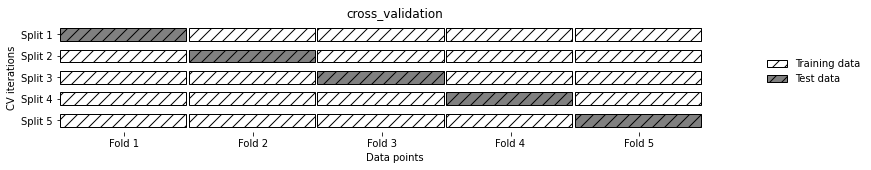

In [2]:
mglearn.plots.plot_cross_validation()

In [3]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
iris = load_iris()
logreg = LogisticRegression()
scores = cross_val_score(logreg,iris.data,iris.target,cv=5)
print(scores)
print(scores.mean())

[0.96666667 1.         0.93333333 0.96666667 1.        ]
0.9733333333333334


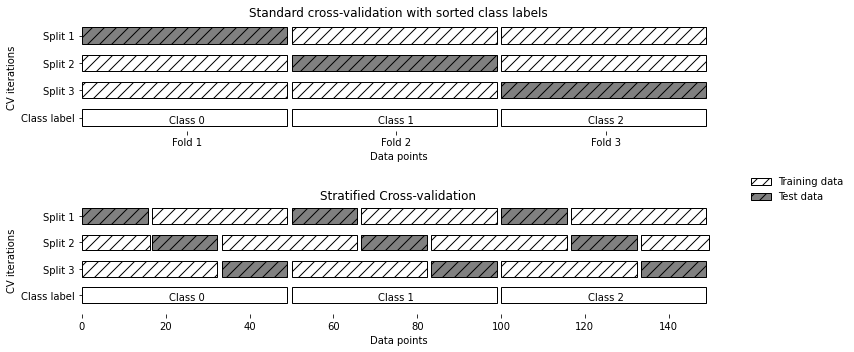

In [4]:
mglearn.plots.plot_stratified_cross_validation()

In [10]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)
cross_val_score(logreg,iris.data,iris.target,cv=kfold)

array([1.        , 1.        , 0.86666667, 0.93333333, 0.83333333])

In [11]:
kfold = KFold(n_splits=3)
cross_val_score(logreg,iris.data,iris.target,cv=kfold)

array([0., 0., 0.])

In [12]:
kfold = KFold(n_splits=3,random_state=0,shuffle=True)
cross_val_score(logreg,iris.data,iris.target,cv=kfold)

array([0.98, 0.96, 0.96])

In [13]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = cross_val_score(logreg,iris.data,iris.target,cv=loo)
print(scores)
print(scores.mean())
print(len(scores))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
0.9666666666666667
150


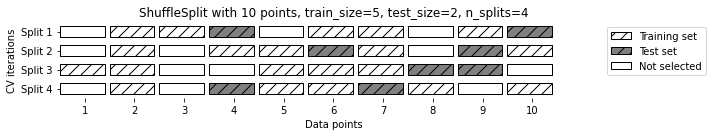

In [14]:
mglearn.plots.plot_shuffle_split()


In [15]:
from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(test_size=.5,train_size=.5,n_splits=10)
scores = cross_val_score(logreg,iris.data,iris.target,cv=shuffle_split)
print(scores)
print(scores.mean())

[0.96       0.93333333 0.94666667 0.97333333 0.94666667 0.97333333
 0.94666667 0.96       0.96       1.        ]
0.9600000000000002


In [16]:
from sklearn.model_selection import GroupKFold
from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples=12,random_state=0)
groups =  [0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3]
scores = cross_val_score(logreg,X,y,groups,cv=GroupKFold(n_splits=3))
scores

array([0.75      , 0.6       , 0.66666667])

In [12]:
#mglearn.plots.plot_label_kfold()

In [13]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
 iris.data, iris.target, random_state=0)
print("Size of training set: {} and Size of test set: {}".format(
 X_train.shape[0], X_test.shape[0]))
best_score = 0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
 # for each combination of parameters, train an SVC
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
 # evaluate the SVC on the test set
        score = svm.score(X_test, y_test)
 # if we got a better score, store the score and parameters
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))


Size of training set: 112 and Size of test set: 38
Best score: 0.97
Best parameters: {'C': 100, 'gamma': 0.001}


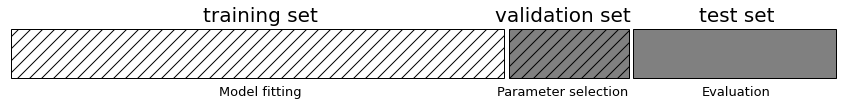

In [14]:
mglearn.plots.plot_threefold_split()

In [15]:
from sklearn.svm import SVC
# split data into train+validation set and test set
X_trainval, X_test, y_trainval, y_test = train_test_split(iris.data, iris.target, random_state=0)
# split train+validation set into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=1)
print("Size of training set: {} size of validation set: {} size of test set:"
 " {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))
best_score = 0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
 # for each combination of parameters, train an SVC
         svm = SVC(gamma=gamma, C=C)
         svm.fit(X_train, y_train)
 # evaluate the SVC on the test set
         score = svm.score(X_valid, y_valid)
 # if we got a better score, store the score and parameters
         if score > best_score:
              best_score = score
              best_parameters = {'C': C, 'gamma': gamma}
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best parameters: ", best_parameters)
print("Test set score with best parameters: {:.2f}".format(test_score))

Size of training set: 84 size of validation set: 28 size of test set: 38

Best score on validation set: 0.96
Best parameters:  {'C': 10, 'gamma': 0.001}
Test set score with best parameters: 0.92


In [16]:
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma=gamma,C=C)
        scores = cross_val_score(svm,X_trainval,y_trainval,cv=5)
        score = np.mean(scores)
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
# rebuild a model on the combined training and validation set
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)

SVC(C=10, gamma=0.1)

In [17]:
#mglearn.plots.plot_cross_val_selection()


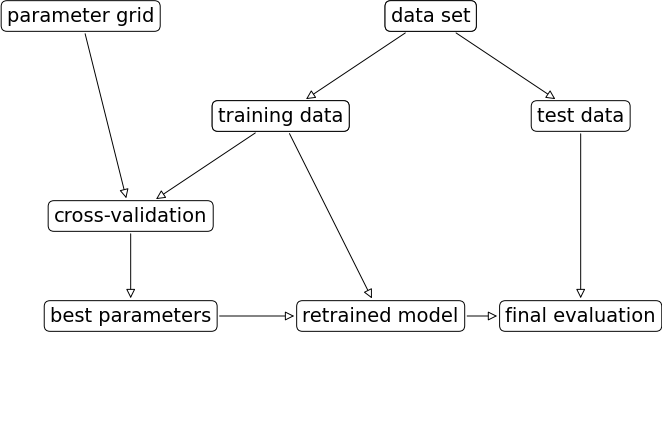

In [18]:
mglearn.plots.plot_grid_search_overview()

In [19]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
print("Parameter grid:\n{}".format(param_grid))

Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
X_train, X_test, y_train, y_test = train_test_split(
 iris.data, iris.target, random_state=0)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]})

In [21]:
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))

Test set score: 0.97


In [22]:
print("Best estimator:\n{}".format(grid_search.best_estimator_))

Best estimator:
SVC(C=10, gamma=0.1)


In [23]:
results = pd.DataFrame(grid_search.cv_results_)
results.set_index(results.rank_test_score,inplace=True)
results.sort_index()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
rank_test_score,,,,,,,,,,,,,,,
1,0.000599,4.887354e-04,0.000399,4.889282e-04,10,0.1,"{'C': 10, 'gamma': 0.1}",1.000000,0.956522,1.000000,0.954545,0.954545,0.973123,0.021957,1
2,0.000592,4.835430e-04,0.000399,4.881695e-04,100,0.01,"{'C': 100, 'gamma': 0.01}",1.000000,0.913043,1.000000,0.954545,0.954545,0.964427,0.032761,2
3,0.000606,4.947440e-04,0.000398,4.879970e-04,1,0.1,"{'C': 1, 'gamma': 0.1}",1.000000,0.956522,1.000000,0.909091,0.954545,0.964032,0.033918,3
3,0.000805,4.027252e-04,0.000398,4.871176e-04,100,0.001,"{'C': 100, 'gamma': 0.001}",1.000000,0.956522,1.000000,0.909091,0.954545,0.964032,0.033918,3
3,0.000599,4.892435e-04,0.000199,3.978729e-04,10,0.01,"{'C': 10, 'gamma': 0.01}",1.000000,0.956522,1.000000,0.909091,0.954545,0.964032,0.033918,3
6,0.000991,1.269014e-05,0.001003,1.221541e-05,0.1,1,"{'C': 0.1, 'gamma': 1}",1.000000,0.913043,1.000000,0.909091,0.954545,0.955336,0.039794,6
7,0.000797,3.986443e-04,0.000201,4.016876e-04,100,0.1,"{'C': 100, 'gamma': 0.1}",1.000000,0.956522,1.000000,0.863636,0.954545,0.954941,0.049799,7
8,0.000800,4.003005e-04,0.000590,4.820233e-04,1,1,"{'C': 1, 'gamma': 1}",0.956522,0.913043,1.000000,0.909091,0.954545,0.946640,0.033305,8
9,0.000798,3.992212e-04,0.000399,4.885218e-04,100,1,"{'C': 100, 'gamma': 1}",0.956522,0.956522,1.000000,0.863636,0.954545,0.946245,0.044708,9


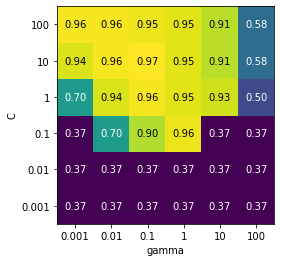

In [24]:
scores = np.array(results.mean_test_score).reshape(6,6)
mglearn.tools.heatmap(scores,xlabel='gamma',ylabel='C',cmap='viridis',
                      xticklabels=param_grid['gamma'],yticklabels=param_grid['C'])

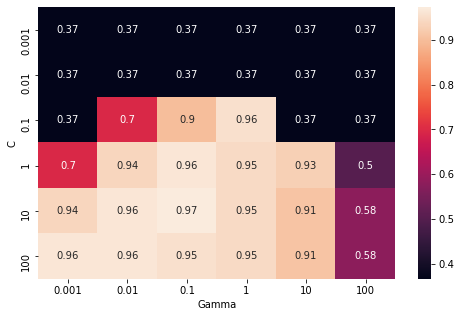

In [25]:
import seaborn as sns
plt.figure(figsize=(8,5))
sns.heatmap(scores,xticklabels=param_grid['gamma'],yticklabels=param_grid['C'],annot=True)
plt.xlabel('Gamma')
plt.ylabel('C')
plt.show()

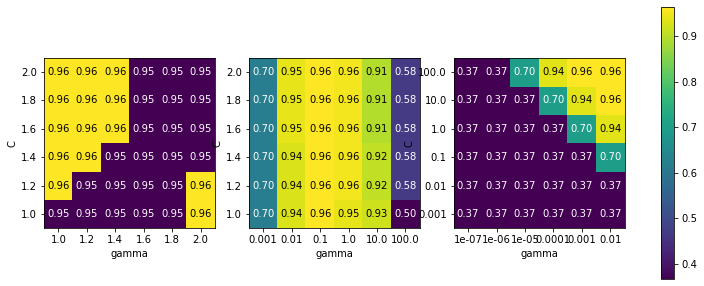

In [26]:
fig, axes = plt.subplots(1, 3, figsize=(13, 5))
param_grid_linear = {'C': np.linspace(1, 2, 6),
 'gamma': np.linspace(1, 2, 6)}
param_grid_one_log = {'C': np.linspace(1, 2, 6),
 'gamma': np.logspace(-3, 2, 6)}
param_grid_range = {'C': np.logspace(-3, 2, 6),
 'gamma': np.logspace(-7, -2, 6)}
for param_grid, ax in zip([param_grid_linear, param_grid_one_log,
 param_grid_range], axes):
 grid_search = GridSearchCV(SVC(), param_grid, cv=5)
 grid_search.fit(X_train, y_train)
 scores = grid_search.cv_results_['mean_test_score'].reshape(6, 6)
 # plot the mean cross-validation scores
 scores_image = mglearn.tools.heatmap(
 scores, xlabel='gamma', ylabel='C', xticklabels=param_grid['gamma'],
 yticklabels=param_grid['C'], cmap="viridis", ax=ax)
plt.colorbar(scores_image, ax=axes.tolist())

In [27]:
param_grid = [
    {'kernel':['rbf'],'C':[0.1,0.01,0.05],'gamma':[0.01,0.1,0.5]},
    {'kernel':['linear'],'C':[0.01,0.1,0.5]}
    
]
param_grid

[{'kernel': ['rbf'], 'C': [0.1, 0.01, 0.05], 'gamma': [0.01, 0.1, 0.5]},
 {'kernel': ['linear'], 'C': [0.01, 0.1, 0.5]}]

In [28]:
from sklearn.model_selection import GridSearchCV
gridsearch = GridSearchCV(SVC(),param_grid,cv=5)
gridsearch.fit(X_train,y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))


Best parameters: {'C': 100.0, 'gamma': 0.01}
Best cross-validation score: 0.96


In [29]:
results = pd.DataFrame(gridsearch.cv_results_)
display(results)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003096,0.006193,0.000000,0.000000,0.1,0.01,rbf,"{'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}",0.695652,0.695652,0.681818,0.681818,0.727273,0.696443,0.016610,7
1,0.000000,0.000000,0.000000,0.000000,0.1,0.1,rbf,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}",0.913043,0.913043,0.909091,0.863636,0.909091,0.901581,0.019054,4
2,0.000400,0.000800,0.003319,0.006149,0.1,0.5,rbf,"{'C': 0.1, 'gamma': 0.5, 'kernel': 'rbf'}",0.956522,0.913043,1.000000,0.909091,0.954545,0.946640,0.033305,3
3,0.000997,0.000005,0.001002,0.000013,0.01,0.01,rbf,"{'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,9
4,0.001192,0.000386,0.000398,0.000488,0.01,0.1,rbf,"{'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,9
5,0.000993,0.000011,0.000199,0.000399,0.01,0.5,rbf,"{'C': 0.01, 'gamma': 0.5, 'kernel': 'rbf'}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,9
6,0.000998,0.000001,0.000199,0.000398,0.05,0.01,rbf,"{'C': 0.05, 'gamma': 0.01, 'kernel': 'rbf'}",0.347826,0.347826,0.363636,0.363636,0.409091,0.366403,0.022485,9
7,0.001003,0.000010,0.000997,0.000003,0.05,0.1,rbf,"{'C': 0.05, 'gamma': 0.1, 'kernel': 'rbf'}",0.695652,0.695652,0.681818,0.681818,0.727273,0.696443,0.016610,7
8,0.000998,0.000004,0.000790,0.000395,0.05,0.5,rbf,"{'C': 0.05, 'gamma': 0.5, 'kernel': 'rbf'}",0.869565,0.913043,0.772727,0.863636,0.909091,0.865613,0.050571,5
9,0.000810,0.000405,0.000393,0.000482,0.01,NaN,linear,"{'C': 0.01, 'kernel': 'linear'}",0.869565,0.869565,0.772727,0.772727,0.909091,0.838735,0.055794,6


In [30]:
scores = cross_val_score(GridSearchCV(SVC(),param_grid,cv=5),iris.data,iris.target,cv=5)
print(scores)
print(scores.mean())

[0.96666667 1.         1.         0.96666667 1.        ]
0.9866666666666667


In [31]:
from sklearn.datasets import load_digits
digits = load_digits()
y = digits.target == 9
X_train,X_test, y_train,y_test = train_test_split(digits.data,y,random_state=42)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(1347, 64) (1347,)
(450, 64) (450,)


In [32]:
np.bincount(y_test)

array([402,  48], dtype=int64)

In [33]:
from sklearn.dummy import DummyClassifier
dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train,y_train)
dummy_majority.score(X_test,y_test)
pred_most_frequent = dummy_majority.predict(X_test)

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report
tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)
print("Test score: {:.2f}".format(tree.score(X_test, y_test)))


Test score: 0.92


In [35]:
from sklearn.linear_model import LogisticRegression
dummy = DummyClassifier().fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)
print("dummy score: {:.2f}".format(dummy.score(X_test, y_test)))
logreg = LogisticRegression(C=0.1).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print("logreg score: {:.2f}".format(logreg.score(X_test, y_test)))

dummy score: 0.89
logreg score: 0.98


Confusion matrix:
[[399   3]
 [  5  43]]


<AxesSubplot:>

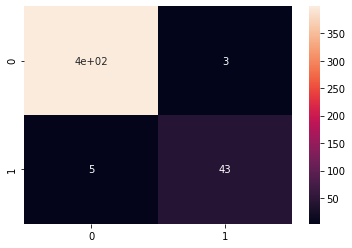

In [36]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test,pred_logreg)
print("Confusion matrix:\n{}".format(confusion))
sns.heatmap(confusion,annot=True)

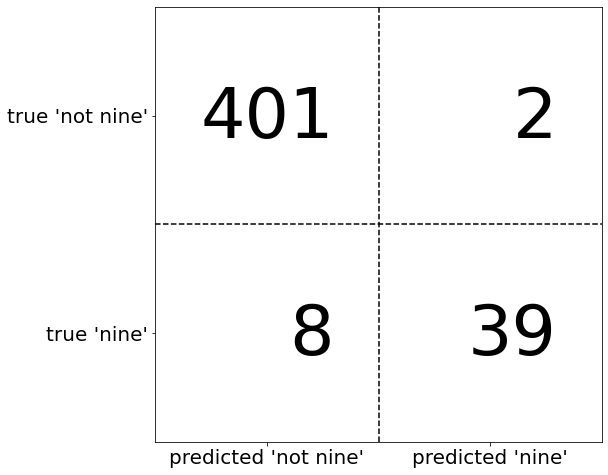

In [37]:
mglearn.plots.plot_confusion_matrix_illustration()

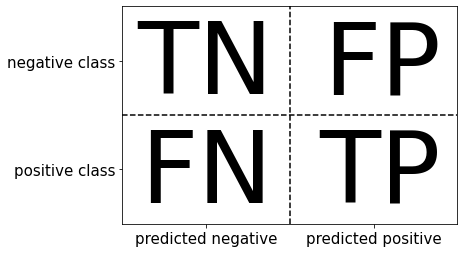

In [38]:
mglearn.plots.plot_binary_confusion_matrix()

In [39]:
print("Most frequent class:")
print(confusion_matrix(y_test, pred_most_frequent))
print("\nDummy model:")
print(confusion_matrix(y_test, pred_dummy))
print("\nDecision tree:")
print(confusion_matrix(y_test, pred_tree))
print("\nLogistic Regression")
print(confusion_matrix(y_test, pred_logreg))


Most frequent class:
[[402   0]
 [ 48   0]]

Dummy model:
[[402   0]
 [ 48   0]]

Decision tree:
[[376  26]
 [ 12  36]]

Logistic Regression
[[399   3]
 [  5  43]]


In [40]:
from sklearn.metrics import f1_score
print("f1 score most frequent: {:.2f}".format(
 f1_score(y_test, pred_most_frequent)))
print("f1 score dummy: {:.2f}".format(f1_score(y_test, pred_dummy)))
print("f1 score tree: {:.2f}".format(f1_score(y_test, pred_tree)))
print("f1 score logistic regression: {:.2f}".format(
 f1_score(y_test, pred_logreg)))


f1 score most frequent: 0.00
f1 score dummy: 0.00
f1 score tree: 0.65
f1 score logistic regression: 0.91


In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_most_frequent,
 target_names=["not nine", "nine"]))

              precision    recall  f1-score   support

    not nine       0.89      1.00      0.94       402
        nine       0.00      0.00      0.00        48

    accuracy                           0.89       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.89      0.84       450



In [42]:
print(classification_report(y_test, pred_dummy,
 target_names=["not nine", "nine"]))


              precision    recall  f1-score   support

    not nine       0.89      1.00      0.94       402
        nine       0.00      0.00      0.00        48

    accuracy                           0.89       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.89      0.84       450



In [43]:
print(classification_report(y_test, pred_logreg,
 target_names=["not nine", "nine"]))


              precision    recall  f1-score   support

    not nine       0.99      0.99      0.99       402
        nine       0.93      0.90      0.91        48

    accuracy                           0.98       450
   macro avg       0.96      0.94      0.95       450
weighted avg       0.98      0.98      0.98       450



In [44]:
from mglearn.datasets import make_blobs
X, y = make_blobs(n_samples=(400, 50), centers=2, cluster_std=[7.0, 2],
 random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(gamma=.05).fit(X_train, y_train)

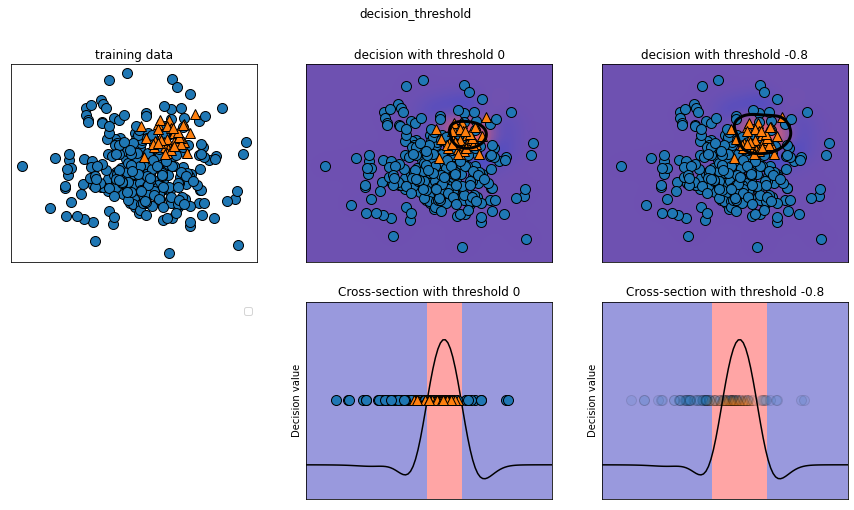

In [45]:
mglearn.plots.plot_decision_threshold()


In [46]:
print(classification_report(y_test, svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       104
           1       0.35      0.67      0.46         9

    accuracy                           0.88       113
   macro avg       0.66      0.78      0.70       113
weighted avg       0.92      0.88      0.89       113



In [47]:
y_pred_lower_threshold = svc.decision_function(X_test) > -.8

In [48]:
print(classification_report(y_test, y_pred_lower_threshold))


              precision    recall  f1-score   support

           0       1.00      0.82      0.90       104
           1       0.32      1.00      0.49         9

    accuracy                           0.83       113
   macro avg       0.66      0.91      0.69       113
weighted avg       0.95      0.83      0.87       113



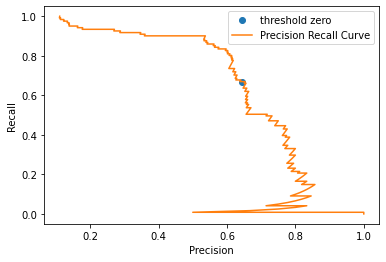

In [49]:
from sklearn.metrics import precision_recall_curve
precision,recall,threshold = precision_recall_curve(y_test,svc.decision_function(X_test))
X, y = make_blobs(n_samples=(4000, 500), centers=2, cluster_std=[7.0, 2],
 random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(gamma=.05).fit(X_train, y_train)
precision, recall, thresholds = precision_recall_curve(
 y_test, svc.decision_function(X_test))
close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero],recall[close_zero],'o',label='threshold zero')
plt.plot(precision,recall,label='Precision Recall Curve')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.legend()
plt.show()

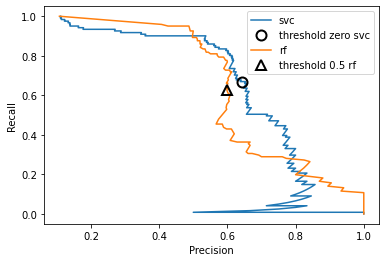

In [50]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=0, max_features=2)
rf.fit(X_train, y_train)
# RandomForestClassifier has predict_proba, but not decision_function
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(
 y_test, rf.predict_proba(X_test)[:, 1])
plt.plot(precision, recall, label="svc")
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
 label="threshold zero svc", fillstyle="none", c='k', mew=2)
plt.plot(precision_rf, recall_rf, label="rf")
close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(precision_rf[close_default_rf], recall_rf[close_default_rf], '^', c='k',
 markersize=10, label="threshold 0.5 rf", fillstyle="none", mew=2)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")


In [51]:
print("f1_score of random forest: {:.3f}".format(
 f1_score(y_test, rf.predict(X_test))))
print("f1_score of svc: {:.3f}".format(f1_score(y_test, svc.predict(X_test))))

f1_score of random forest: 0.610
f1_score of svc: 0.656


In [52]:
from sklearn.metrics import average_precision_score
ap_rf = average_precision_score(y_test,rf.predict_proba(X_test)[:,1])
ap_svm = average_precision_score(y_test,svc.decision_function(X_test))
print(ap_rf,ap_svm)

0.659559370099291 0.6663140319391998


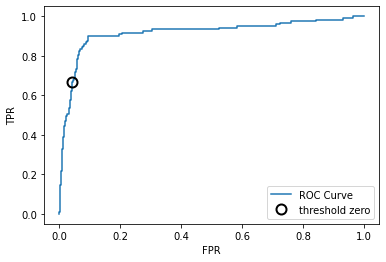

In [60]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds = roc_curve(y_test,svc.decision_function(X_test))
plt.plot(fpr,tpr,label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
 label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

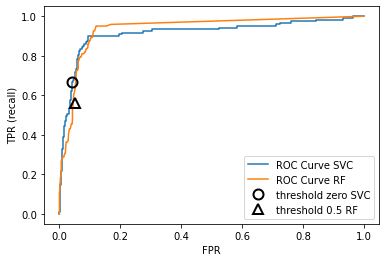

In [61]:
from sklearn.metrics import roc_curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label="ROC Curve SVC")
plt.plot(fpr_rf, tpr_rf, label="ROC Curve RF")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,label="threshold zero SVC", fillstyle="none", c='k', mew=2)
close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(fpr_rf[close_default_rf], tpr[close_default_rf], '^', markersize=10,label="threshold 0.5 RF", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)


In [64]:
from sklearn.metrics import roc_auc_score
rf_auc = roc_auc_score(y_test,rf.predict_proba(X_test)[:,1])
svc_auc = roc_auc_score(y_test,svc.decision_function(X_test))
print("AUC for Random Forest: {:.3f}".format(rf_auc))
print("AUC for SVC: {:.3f}".format(svc_auc))


AUC for Random Forest: 0.937
AUC for SVC: 0.916


gamma = 1.00 accuracy = 0.90 AUC = 0.50
gamma = 0.05 accuracy = 0.90 AUC = 1.00
gamma = 0.01 accuracy = 0.90 AUC = 1.00


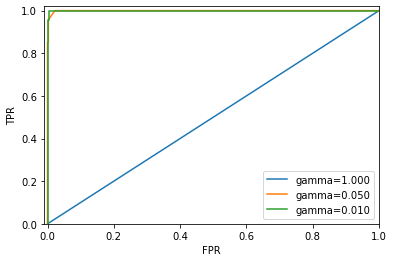

In [68]:
y = digits.target == 9
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=0)
plt.figure()
for gamma in [1, 0.05, 0.01]:
    svc = SVC(gamma=gamma).fit(X_train, y_train)
    accuracy = svc.score(X_test, y_test)
    auc = roc_auc_score(y_test, svc.decision_function(X_test))
    fpr, tpr, thresholds = roc_curve(y_test , svc.decision_function(X_test))
    print("gamma = {:.2f} accuracy = {:.2f} AUC = {:.2f}".format(
    gamma, accuracy, auc))
    plt.plot(fpr, tpr, label="gamma={:.3f}".format(gamma))
    ##close_zero = np.argmin(np.abs(thresholds))
    ##plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,label="threshold zero", fillstyle="none", c='k', mew=2)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.xlim(-0.01, 1)
plt.ylim(0, 1.02)
plt.legend(loc="best")


In [72]:
print(fpr)
print(tpr)

[0.         0.         0.         0.00248139 0.00248139 0.00496278
 0.00496278 1.        ]
[0.         0.0212766  0.85106383 0.85106383 0.95744681 0.95744681
 1.         1.        ]


In [81]:
threshold[np.where((tpr==1) & (fpr<0.01))]

array([-0.24173165])

In [83]:
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(
 digits.data, digits.target, random_state=0)
lr = LogisticRegression().fit(X_train, y_train)
pred = lr.predict(X_test)
print("Accuracy: {:.3f}".format(accuracy_score(y_test, pred)))
print("Confusion matrix:\n{}".format(confusion_matrix(y_test, pred)))

Accuracy: 0.951
Confusion matrix:
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  2  1]
 [ 0  1 40  3  0  0  0  0  0  0]
 [ 0  0  0 43  0  0  0  0  1  1]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 46  0  0  0  2]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  1  1  0  0 46  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  0  0  1  0  0  1 45]]


Text(0.5, 1.0, 'Confusion matrix')

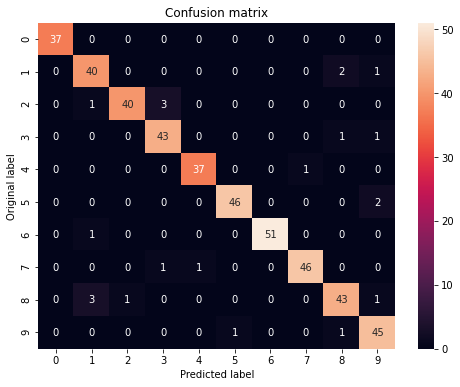

In [87]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, pred),annot=True)
plt.xlabel('Predicted label')
plt.ylabel('Original label')
plt.title('Confusion matrix')

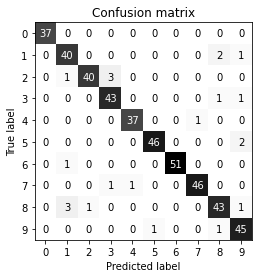

In [86]:
scores_image = mglearn.tools.heatmap(
 confusion_matrix(y_test, pred), xlabel='Predicted label',
 ylabel='True label', xticklabels=digits.target_names,
 yticklabels=digits.target_names, cmap=plt.cm.gray_r, fmt="%d")
plt.title("Confusion matrix")
plt.gca().invert_yaxis()


In [88]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.89      0.93      0.91        43
           2       0.98      0.91      0.94        44
           3       0.91      0.96      0.93        45
           4       0.97      0.97      0.97        38
           5       0.98      0.96      0.97        48
           6       1.00      0.98      0.99        52
           7       0.98      0.96      0.97        48
           8       0.91      0.90      0.91        48
           9       0.90      0.96      0.93        47

    accuracy                           0.95       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.95      0.95      0.95       450



In [89]:
print("Micro average f1 score: {:.3f}".format
 (f1_score(y_test, pred, average="micro")))
print("Macro average f1 score: {:.3f}".format
 (f1_score(y_test, pred, average="macro")))


Micro average f1 score: 0.951
Macro average f1 score: 0.952


In [90]:
# default scoring for classification is accuracy
print("Default scoring: {}".format(
 cross_val_score(SVC(), digits.data, digits.target == 9)))
# providing scoring="accuracy" doesn't change the results
explicit_accuracy = cross_val_score(SVC(), digits.data, digits.target == 9,
 scoring="accuracy")
print("Explicit accuracy scoring: {}".format(explicit_accuracy))
roc_auc = cross_val_score(SVC(), digits.data, digits.target == 9,
 scoring="roc_auc")
print("AUC scoring: {}".format(roc_auc))

Default scoring: [0.975      0.99166667 1.         0.99442897 0.98050139]
Explicit accuracy scoring: [0.975      0.99166667 1.         0.99442897 0.98050139]
AUC scoring: [0.99717078 0.99854252 1.         0.999828   0.98400413]


In [91]:
X_train, X_test, y_train, y_test = train_test_split(
 digits.data, digits.target == 9, random_state=0)
# we provide a somewhat bad grid to illustrate the point:
param_grid = {'gamma': [0.0001, 0.01, 0.1, 1, 10]}
# using the default scoring of accuracy:
grid = GridSearchCV(SVC(), param_grid=param_grid)
grid.fit(X_train, y_train)
print("Grid-Search with accuracy")
print("Best parameters:", grid.best_params_)
print("Best cross-validation score (accuracy)): {:.3f}".format(grid.best_score_))
print("Test set AUC: {:.3f}".format(
 roc_auc_score(y_test, grid.decision_function(X_test))))
print("Test set accuracy: {:.3f}".format(grid.score(X_test, y_test)))


Grid-Search with accuracy
Best parameters: {'gamma': 0.0001}
Best cross-validation score (accuracy)): 0.976
Test set AUC: 0.992
Test set accuracy: 0.973


In [92]:
grid = GridSearchCV(SVC(), param_grid=param_grid, scoring="roc_auc")
grid.fit(X_train, y_train)
print("\nGrid-Search with AUC")
print("Best parameters:", grid.best_params_)
print("Best cross-validation score (AUC): {:.3f}".format(grid.best_score_))
print("Test set AUC: {:.3f}".format(
 roc_auc_score(y_test, grid.decision_function(X_test))))
print("Test set accuracy: {:.3f}".format(grid.score(X_test, y_test)))


Grid-Search with AUC
Best parameters: {'gamma': 0.01}
Best cross-validation score (AUC): 0.998
Test set AUC: 1.000
Test set accuracy: 1.000
